## Eda principal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Conectar a la base de datos
con = sqlite3.connect("/workspaces/proyecto-final/Proyecto_filtrada.db")
#  cuántas filas hay
total = pd.read_sql("SELECT COUNT(*) AS total_filas FROM santander_trimestre;", con)
print(total)

   total_filas
0      1183139


In [2]:
import pandas as pd
con = sqlite3.connect("/workspaces/proyecto-final/Proyecto_filtrada.db")

df_principal= pd.read_sql("""SELECT * FROM santander_trimestre """, con)
# df_principal.head(10)

: 

In [ ]:
df_principal.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [ ]:
df_principal.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [ ]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183139 entries, 0 to 1183138
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1183139 non-null  object 
 1   ncodpers               1183139 non-null  int64  
 2   ind_empleado           1183139 non-null  object 
 3   pais_residencia        1183139 non-null  object 
 4   sexo                   1183127 non-null  object 
 5   age                    1183139 non-null  object 
 6   fecha_alta             1183139 non-null  object 
 7   ind_nuevo              1183139 non-null  float64
 8   antiguedad             1183139 non-null  object 
 9   indrel                 1183139 non-null  float64
 10  ult_fec_cli_1t         311 non-null      object 
 11  indrel_1mes            1178666 non-null  object 
 12  tiprel_1mes            1178666 non-null  object 
 13  indresi                1183139 non-null  object 
 14  indext            

## Se eliminan las columnas con más nulos

In [6]:
df_principal.isnull().sum().sort_values(ascending=False)

conyuemp                 1182861
ult_fec_cli_1t           1182828
renta                     269367
cod_prov                    6499
nomprov                     6499
segmento                    5626
canal_entrada               5509
indrel_1mes                 4473
tiprel_1mes                 4473
sexo                          12
age                            0
fecha_alta                     0
ind_nuevo                      0
fecha_dato                     0
ind_empleado                   0
ncodpers                       0
indext                         0
indresi                        0
indrel                         0
antiguedad                     0
pais_residencia                0
indfall                        0
tipodom                        0
ind_actividad_cliente          0
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

## Imputación de nulos

### En la columna numérica renta se realiza la imputación de nulos con la mediana 

### En las columnas categoricas :

        segmento                   5626   Imputación con la palabra desconocido

        canal_entrada              5509   Imputación con la palabra desconocido

        sexo                         12   Imputación con la moda

        tiprel_1mes                4473   Imputación con la moda

### Las siguiente columna  categorica indrel_1mes  tiene valores numéricos y de texto, entonces se convierten todos los valores a tipo string y se imputa con el valor más frecuente que en este  caso sería el valor de 1 

        indrel_1mes                4473


In [ ]:
df_principal.drop(['conyuemp', 'ult_fec_cli_1t'], axis=1, inplace=True)

 # Columna numerica renta, imputación con la ,ediana 
df_principal['renta'].fillna(df_principal['renta'].median(), inplace=True) 


# Columnas categoricas 
df_principal['cod_prov'].fillna(-1, inplace=True)  #numérico  PENDIENTE REVISAR 
df_principal['nomprov'].fillna("DESCONOCIDO", inplace=True)
df_principal['canal_entrada'].fillna("DESCONOCIDO", inplace=True)
df_principal['segmento'].fillna("DESCONOCIDO", inplace=True)
df_principal['sexo'].fillna(df_principal['sexo'].mode()[0], inplace=True)

df_principal['tiprel_1mes'].fillna(df_principal['tiprel_1mes'].mode()[0], inplace=True)

# Convertir los datos a tipo str e imputar con moda
df_principal['indrel_1mes'] = df_principal['indrel_1mes'].astype(str)
df_principal['indrel_1mes'].fillna(df_principal['indrel_1mes'].mode()[0], inplace=True)


##  Se confirma que el df queda sin valores nulos

In [5]:
df_principal.isnull().sum().sort_values(ascending=False)

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

## Renombrando columnas

In [6]:
df_principal.rename(columns={
    'ind_aval_fin_ult1': 'garantias',
    'ind_cno_fin_ult1': 'cuenta_nomina',
    'ind_ctju_fin_ult1': 'cuenta_joven',
    'ind_ctma_fin_ult1' : 'cuenta_adulto_mayor',
    'ind_ctop_fin_ult1' : 'cuenta_apertura',
    'ind_ctpp_fin_ult1' : 'cuenta_pagos',
    'ind_deco_fin_ult1' : 'cuenta_debitos',
    'ind_deme_fin_ult1' : 'cdat mensual',
    'ind_fond_fin_ult1' : 'fondo_inversion',
    'ind_hip_fin_ult1' : 'hipotecas',
    'ind_reca_fin_ult1' : 'recaudaciones',
    'ind_valo_fin_ult1' : 'bonos_acciones',
    'ind_nomina_ult1'  :'nomina_domiciliada',
    'ind_nom_pens_ult1' :'pension_domiciliada',
    'ind_recibo_ult1' : 'recibos_domiciliados',
    'ind_ahor_fin_ult1': 'cuenta_ahorros',
    'ind_cco_fin_ult1': 'cuenta_corriente',
    'ind_dela_fin_ult1': 'deposito_largo_plazo',
    'ind_ecue_fin_ult1': 'ecuenta',
    'ind_pres_fin_ult1': 'prestamo_libre_inversion',
    'ind_tjcr_fin_ult1': 'tarjeta_credito',
    'ind_viv_fin_ult1': 'credito_vivienda',
    'ind_plan_fin_ult1': 'ahorro_programado',
    'ind_cder_fin_ult1':'credito_rapido'

}, inplace=True)


In [7]:
df_principal['age'] = pd.to_numeric(df_principal['age'], errors='coerce')
df_principal['antiguedad'] = pd.to_numeric(df_principal['antiguedad'], errors='coerce')

# Convertir columnas de fecha a tipo datetime
df_principal['fecha_dato'] = pd.to_datetime(df_principal['fecha_dato'], format='%Y-%m-%d', errors='coerce')
df_principal['fecha_alta'] = pd.to_datetime(df_principal['fecha_alta'], format='%Y-%m-%d', errors='coerce')

## Identificar y guardar columnas por tipo para posterior análisis

In [8]:
var_categoricas = []
var_numericas = []
var_fechas = []

for col in df_principal.columns:
    if pd.api.types.is_datetime64_any_dtype(df_principal[col]):
        var_fechas.append(col)
    elif pd.api.types.is_numeric_dtype(df_principal[col]):
        var_numericas.append(col)
    elif df_principal[col].dtype == 'object':
        var_categoricas.append(col)

print("Variables de tipo fecha:")
print(var_fechas)

print("Variables categóricas:")
print(var_categoricas)

print("Variables numéricas:")
print(var_numericas)


Variables de tipo fecha:
['fecha_dato', 'fecha_alta']
Variables categóricas:
['ind_empleado', 'pais_residencia', 'sexo', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']
Variables numéricas:
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'cuenta_ahorros', 'garantias', 'cuenta_corriente', 'credito_rapido', 'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos', 'cuenta_debitos', 'cdat mensual', 'deposito_largo_plazo', 'ecuenta', 'fondo_inversion', 'hipotecas', 'ahorro_programado', 'prestamo_libre_inversion', 'recaudaciones', 'tarjeta_credito', 'bonos_acciones', 'credito_vivienda', 'nomina_domiciliada', 'pension_domiciliada', 'recibos_domiciliados']


## Conteo de frecuencias para determinas desbalanceo de las columnas targes que son las que inician con ind

In [9]:
def conteo(x):
    frecuencias = df_principal[x].value_counts()
    print(f"Distribución de la variable '{x}':")
    print(frecuencias)
    print("-" * 40)

for i in var_numericas:
    conteo(i)

Distribución de la variable 'ncodpers':
ncodpers
1052331    3
1052328    3
1052342    3
1052322    3
1052343    3
          ..
1165575    1
1166019    1
1165261    1
1172545    1
1171591    1
Name: count, Length: 405737, dtype: int64
----------------------------------------
Distribución de la variable 'age':
age
21     42698
24     40426
22     39552
23     39355
43     35177
       ...  
116        9
109        5
112        4
114        4
117        3
Name: count, Length: 115, dtype: int64
----------------------------------------
Distribución de la variable 'ind_nuevo':
ind_nuevo
0.0    1113802
1.0      69337
Name: count, dtype: int64
----------------------------------------
Distribución de la variable 'antiguedad':
antiguedad
 8         23644
 7         21792
 6         20110
 20        18365
 19        16276
           ...  
 253         209
 254         190
 255         137
 256          80
-999999        6
Name: count, Length: 258, dtype: int64
------------------------------------

In [10]:
# Lista con las variables de 2 valores  
variables_binarias = [
    'cuenta_ahorros', 'garantias', 'cuenta_corriente', 'credito_rapido',
    'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura',
    'cuenta_pagos', 'cuenta_debitos', 'cdat mensual', 'deposito_largo_plazo',
    'ecuenta', 'fondo_inversion', 'hipotecas', 'ahorro_programado',
    'prestamo_libre_inversion', 'recaudaciones', 'tarjeta_credito',
    'bonos_acciones', 'credito_vivienda', 'nomina_domiciliada',
    'pension_domiciliada', 'recibos_domiciliados', 'ind_nuevo'
]

# Crear lista de registros para construir DataFrame
resumen = []

for var in variables_binarias:
    total_1 = df_principal[var].sum()
    total_0 = df_principal[var].value_counts().get(0, 0)  # en caso de que no haya 0s
    total = df_principal[var].count()
    porcentaje_1 = round((total_1 / total) * 100, 2)

    resumen.append({
        'variable': var,
        'total_1': int(total_1),
        'total_0': int(total_0),
        'total_registros': total,
        'porcentaje_1': porcentaje_1
    })

# Crear DataFrame
df_resumen = pd.DataFrame(resumen)

# Ordenar por porcentaje de casos positivos
df_resumen.sort_values(by='porcentaje_1', ascending=False, inplace=True)

# Mostrar
print(df_resumen)


                    variable  total_1  total_0  total_registros  porcentaje_1
2           cuenta_corriente   877409   305730          1183139         74.16
23      recibos_domiciliados   334574   848565          1183139         28.28
4              cuenta_nomina   212083   971056          1183139         17.93
12                   ecuenta   206305   976834          1183139         17.44
7            cuenta_apertura   203585   979554          1183139         17.21
22       pension_domiciliada   154285  1028854          1183139         13.04
21        nomina_domiciliada   141381  1041758          1183139         11.95
17             recaudaciones   125878  1057261          1183139         10.64
18           tarjeta_credito   103775  1079364          1183139          8.77
11      deposito_largo_plazo    96756  1086383          1183139          8.18
8               cuenta_pagos    82234  1100905          1183139          6.95
24                 ind_nuevo    69337  1113802          1183139 

## Variables a Evitar (Contexto proyecto) de cooperativas

nomina_domiciliada y pension_domiciliada (son más de bancos)

cuenta_ahorros (casi todos ya la tienen)

Productos muy sofisticados (bonos_acciones, fondo_inversion)

## Variables a evitar según el desbalanceo 

cuenta_ahorros: Solo 171 casos (0.014% del total)

garantias: 48 casos (0.004%)

credito_rapido: 855 casos (0.07%)

prestamo_libre_inversion: 4,895 casos (0.4%)

hipotecas: 13,624 casos (1.15%)

credito_vivienda: 6,870 casos (0.58%)

cdat mensual: 3,132 casos (0.26%)

## Variables a tener en cuenta como target 

cuenta_corriente	305,730	25.8%	

tarjeta_credito	103,775	8.8%	C

deposito_largo_plazo	96,756	8.2%	Captación

ecuenta   206305   976834          1183139         17.44

recibos_domiciliados	334,574	28.3%	


ahorro progarmado pero está muy desbalanceado

Las variables seleccionadas como objetivo son : tarjeta_Credito, deposito a largo plazo y ecuenta (teniendo cuenta el proceso de digitalización actual)

In [13]:
df_principal.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'cuenta_ahorros', 'garantias', 'cuenta_corriente',
       'credito_rapido', 'cuenta_nomina', 'cuenta_joven',
       'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos',
       'cuenta_debitos', 'cdat mensual', 'deposito_largo_plazo', 'ecuenta',
       'fondo_inversion', 'hipotecas', 'ahorro_programado',
       'prestamo_libre_inversion', 'recaudaciones', 'tarjeta_credito',
       'bonos_acciones', 'credito_vivienda', 'nomina_domiciliada',
       'pension_domiciliada', 'recibos_domiciliados'],
      dtype='object')

## Columnas seleccionadas del dataframe original para trabajar con  eda de forma mas especifico, sería nuestro data set a trabajar.

In [22]:
columnas_a_excluir = ['indresi','indext','indfall','pais_residencia','cod_prov','nomprov','tipodom',   
    'pension_domiciliada','nomina_domiciliada','bonos_acciones','fondo_inversion','garantias', 'recibos_domiciliados',
                     'recaudaciones','deposito_largo_plazo', 'ecuenta', 'tarjeta_credito']


In [23]:
df = df_principal.drop(columns=columnas_a_excluir)

# Crear un nuevo DataFrame con solo las columnas seleccionadas
# df = df_principal[columnas_seleccionadas]

In [24]:
df.dtypes

fecha_dato                  datetime64[ns]
ncodpers                             int64
ind_empleado                        object
sexo                                object
age                                  int64
fecha_alta                  datetime64[ns]
ind_nuevo                          float64
antiguedad                           int64
indrel                             float64
indrel_1mes                         object
tiprel_1mes                         object
canal_entrada                       object
ind_actividad_cliente              float64
renta                              float64
segmento                            object
cuenta_ahorros                       int64
cuenta_corriente                     int64
credito_rapido                       int64
cuenta_nomina                        int64
cuenta_joven                         int64
cuenta_adulto_mayor                  int64
cuenta_apertura                      int64
cuenta_pagos                         int64
cuenta_debi

In [25]:
var_categoricas_2 = []
var_numericas_2 = []
var_fechas_2 = []

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        var_fechas_2.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas_2.append(col)
    elif df[col].dtype == 'object':
        var_categoricas_2.append(col)

print("Variables de tipo fecha:")
print(var_fechas_2)

print("Variables categóricas:")
print(var_categoricas_2)

print("Variables numéricas:")
print(var_numericas_2)

Variables de tipo fecha:
['fecha_dato', 'fecha_alta']
Variables categóricas:
['ind_empleado', 'sexo', 'indrel_1mes', 'tiprel_1mes', 'canal_entrada', 'segmento']
Variables numéricas:
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'ind_actividad_cliente', 'renta', 'cuenta_ahorros', 'cuenta_corriente', 'credito_rapido', 'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos', 'cuenta_debitos', 'cdat mensual', 'hipotecas', 'ahorro_programado', 'prestamo_libre_inversion', 'credito_vivienda']


## Analisis de valores atipicos por porcentaje en cada columna continua, no las que sean binarias, usando el rango intercuartilico, se considera outlier todo lo que este fuera del rango

In [26]:
def porcentaje_outliers(df):
    porcentajes = {}
    for col in df.select_dtypes(include='number').columns:
        # Excluir columnas con solo 2 valores únicos (binarias)
        if df[col].nunique() <= 2:
            continue

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        porcentaje = len(outliers) / len(df) * 100
        porcentajes[col] = round(porcentaje, 2)

    return porcentajes

# Resultado
# print(porcentaje_outliers(df))

# Convertir diccionario a DataFrame
df_outliers = pd.DataFrame.from_dict(porcentaje_outliers(df), orient='index', columns=['% Outliers'])

# Resetear índice para tener columna con nombres
df_outliers = df_outliers.reset_index().rename(columns={'index': 'Variable'})

# Ordenar de mayor a menor
df_outliers = df_outliers.sort_values(by='% Outliers', ascending=False)

# Mostrar
print(df_outliers.head(20))  # muestra las 10 con más outliers

     Variable  % Outliers
3       renta        8.47
1         age        1.04
0    ncodpers        0.00
2  antiguedad        0.00


## Contando negativos

In [27]:
columnas_negativos = ['age', 'renta', 'antiguedad']

for col in columnas_negativos:
    negativos = (df[col] < 0).sum()
    print(f"Valores negativos en {col}: {negativos}")



Valores negativos en age: 0
Valores negativos en renta: 0
Valores negativos en antiguedad: 6


In [28]:
df = df[df['antiguedad'] >= 0]

In [29]:
# Contar cuántos tienen edad menor a 18
menores_18 = df[df['age'] < 18].shape[0]    #print("Registros con edad < 18:", (df['age'] < 18).sum())

# Contar cuántos tienen edad mayor a 100
mayores_100 = df[df['age'] > 100].shape[0]

print("Registros con edad < 18:", menores_18)
print("Registros con edad > 100:", mayores_100)



Registros con edad < 18: 16188
Registros con edad > 100: 535


In [30]:
# Contar cuántos tienen edad menor a 18
antiguedad_menor= df[df['antiguedad'] < 0].shape[0]    #print("Registros con edad < 18:", (df['age'] < 18).sum())

# Contar cuántos tienen edad mayor a 100
antiguedad_mayor_100 = df[df['antiguedad'] > 100].shape[0]

print("Registros con antiguedad_menor:", antiguedad_menor)
print("Registros con antiguedad_mayor_100" , antiguedad_mayor_100)


Registros con antiguedad_menor: 0
Registros con antiguedad_mayor_100 487073


In [31]:
var_categoricas_2

['ind_empleado',
 'sexo',
 'indrel_1mes',
 'tiprel_1mes',
 'canal_entrada',
 'segmento']

## Conteo de ceros por columna

In [32]:
# Seleccionar columnas numéricas
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas no binarias
no_binarias = [col for col in cols_numericas if df[col].nunique() > 2]
conteo_ceros = df[no_binarias].apply(lambda col: (col == 0).sum())
print(conteo_ceros)



ncodpers         0
age              0
antiguedad    5371
renta            0
dtype: int64


In [33]:
# Ver registros con antigüedad 0
df_antig_0 = df[df['antiguedad'] == 0]

# Analizar la fecha de alta de esos clientes
print(df_antig_0['fecha_alta'].describe())
# print(df_antig_0['fecha_dato'].min(), df_antig_0['fecha_dato'].max())

count                             5371
mean     2015-07-30 23:43:22.643827968
min                1996-03-25 00:00:00
25%                2016-03-10 00:00:00
50%                2016-04-03 00:00:00
75%                2016-05-02 00:00:00
max                2016-05-31 00:00:00
Name: fecha_alta, dtype: object


## Analisis univariable

In [34]:
top_n = 5
top_categorias = df['canal_entrada'].value_counts().nlargest(top_n).index
df['canal_entrada'] = df['canal_entrada'].apply(lambda x: x if x in top_categorias else 'Otros')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in var_categoricas_2:
    print(df[col].value_counts(normalize=True))  
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


NameError: name 'var_categoricas_2' is not defined

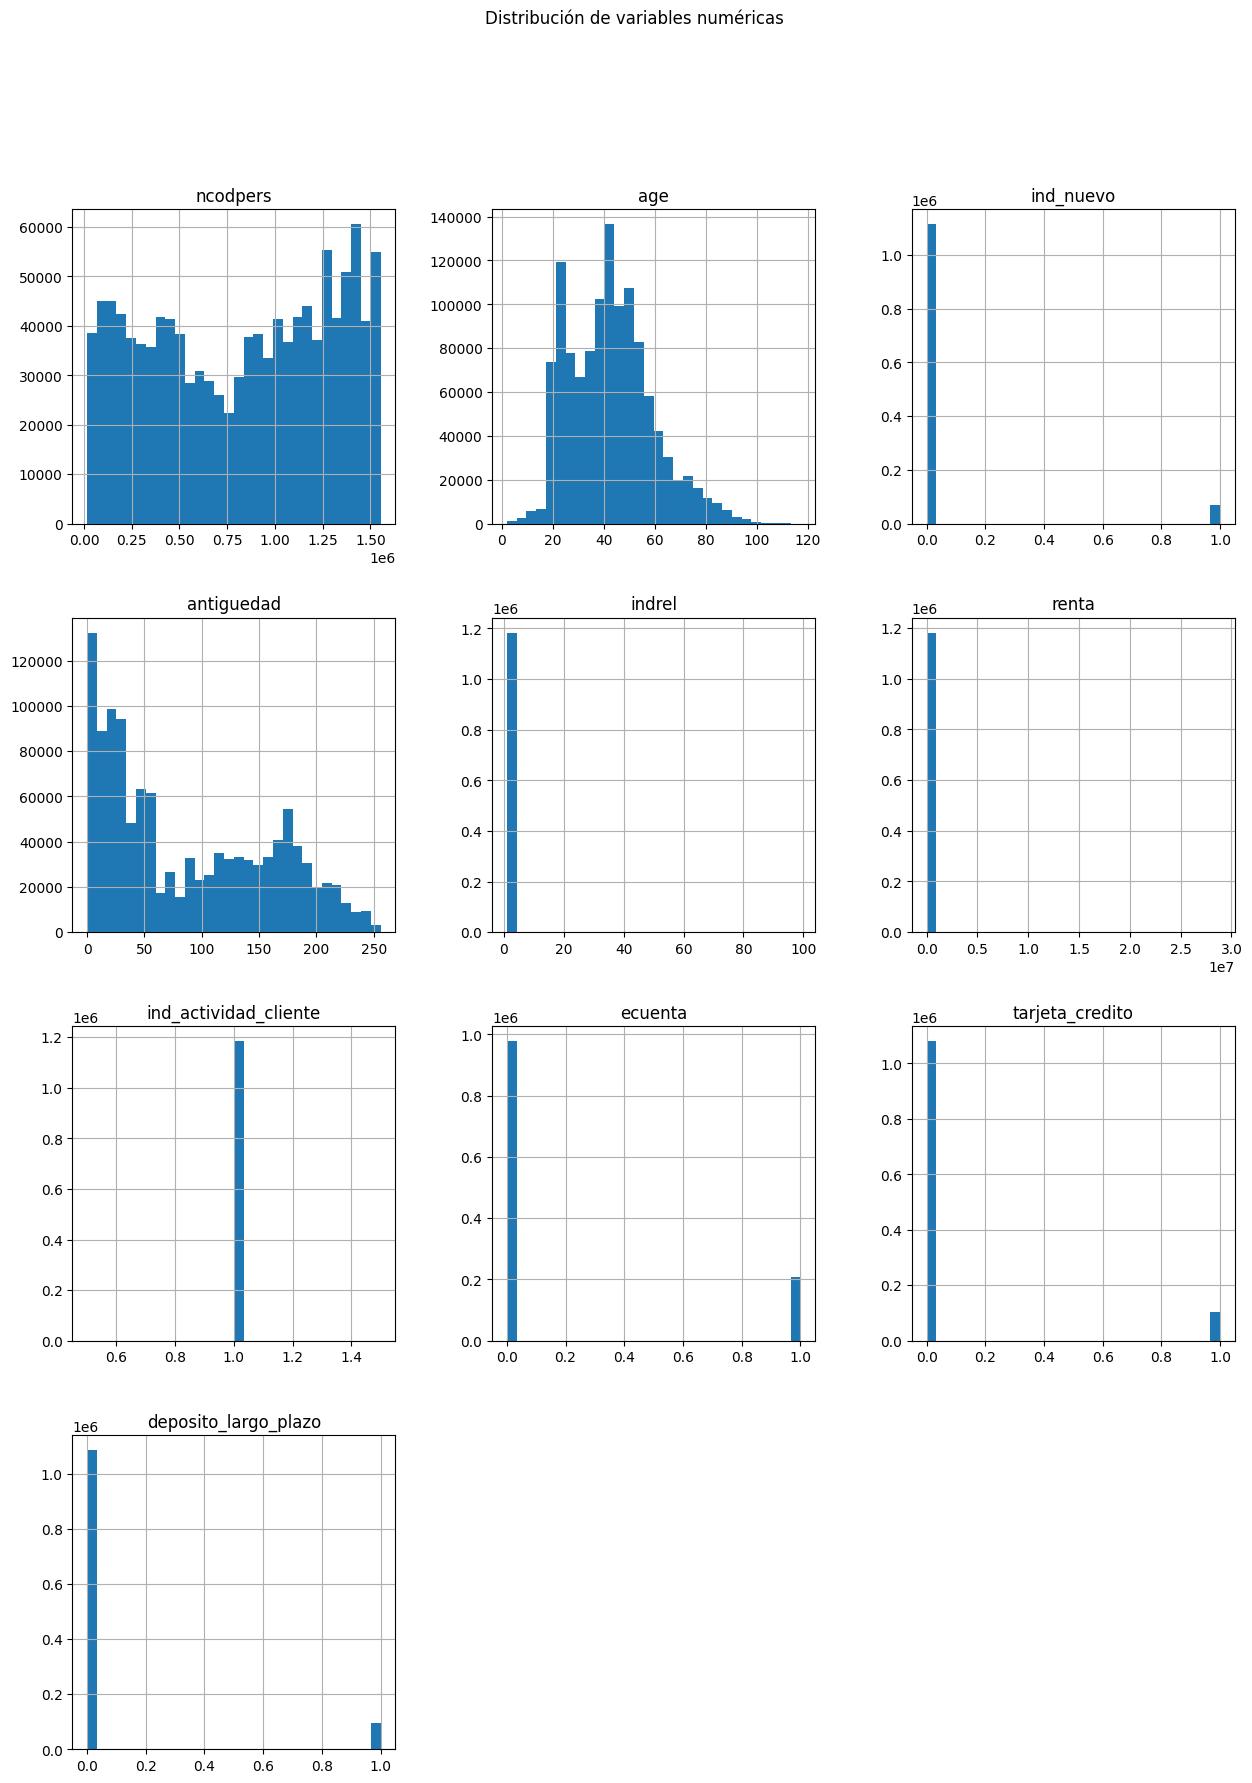

In [49]:
df[var_numericas_2].describe().T
df[var_numericas_2].hist(bins=30, figsize=(15, 20))
plt.suptitle("Distribución de variables numéricas")
plt.show()

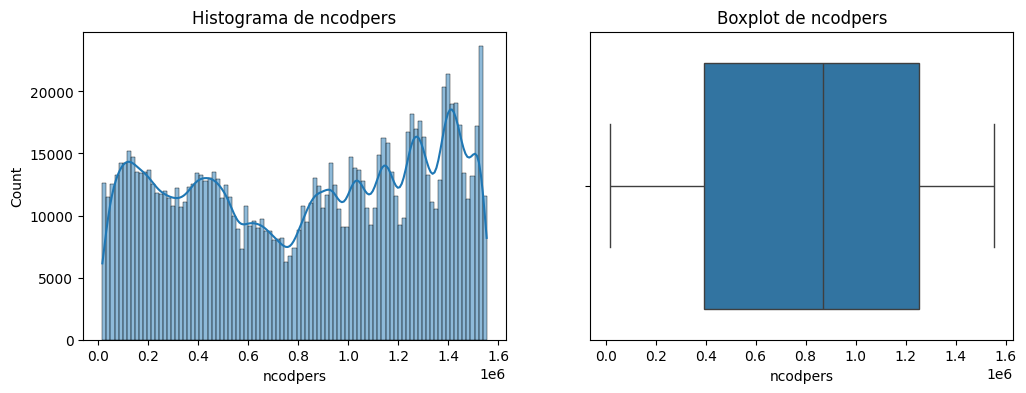

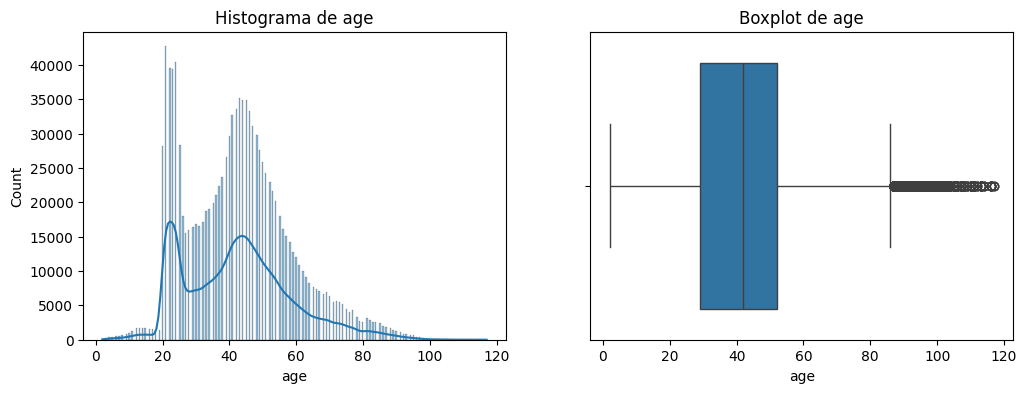

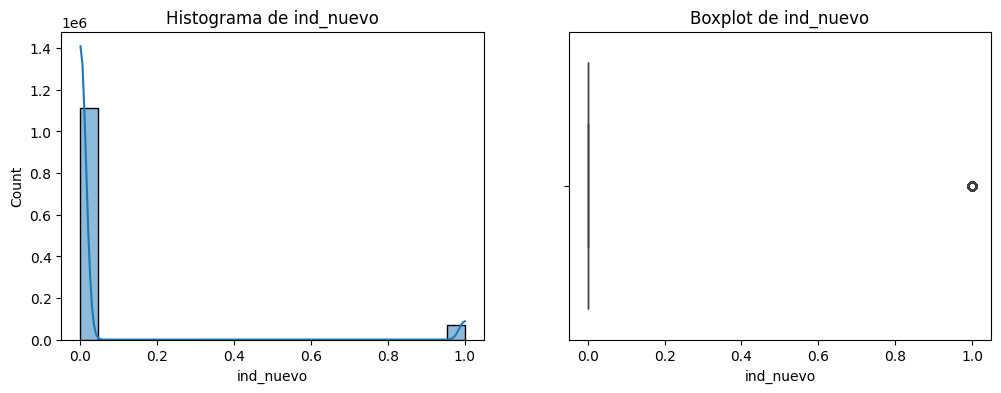

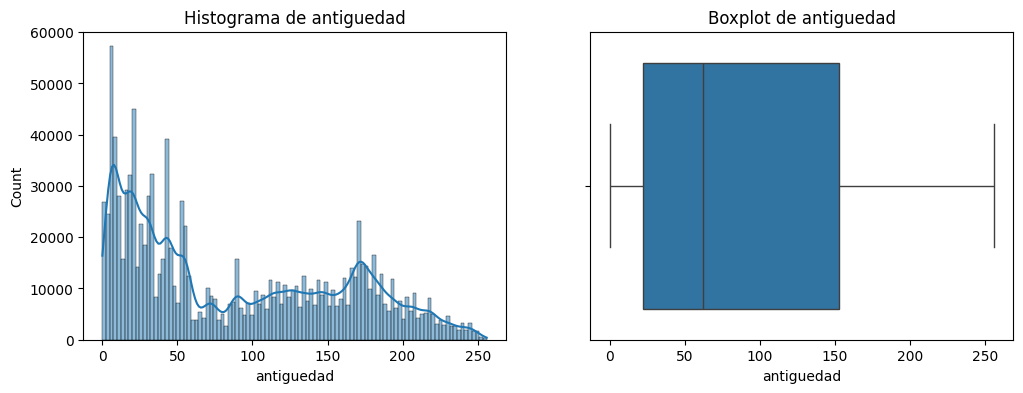

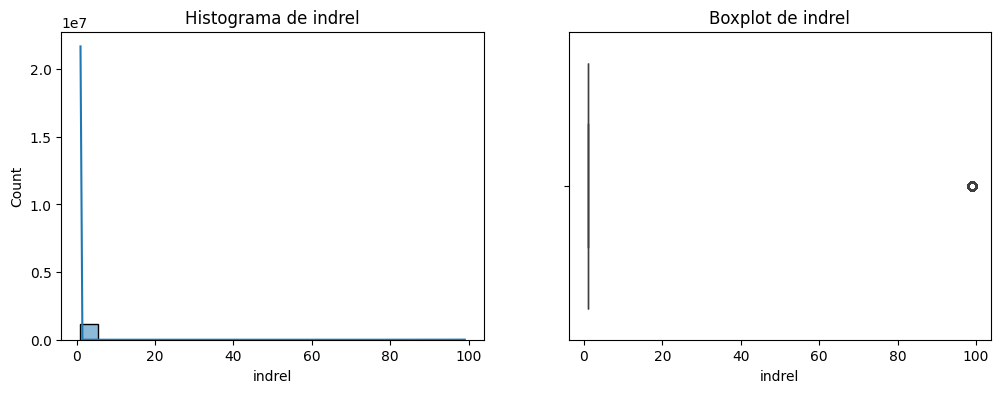

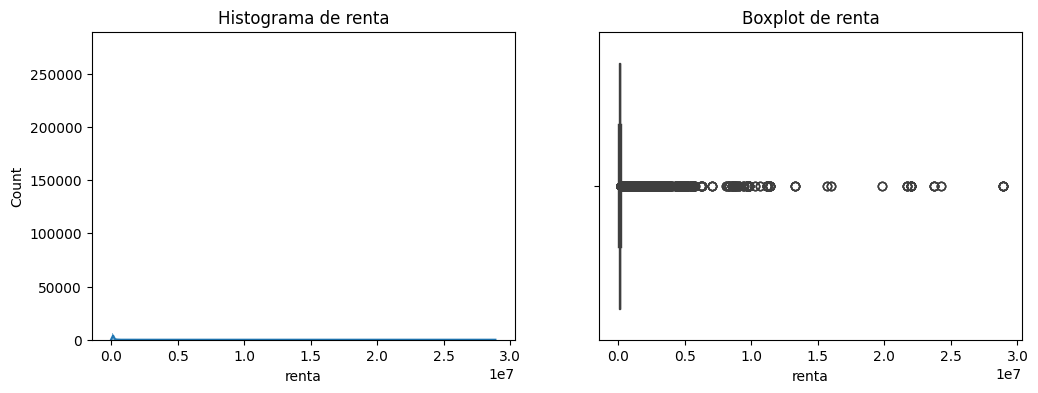

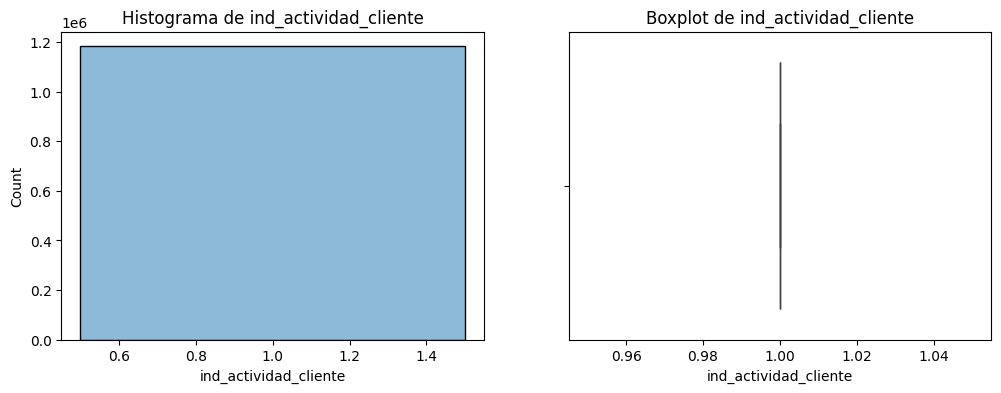

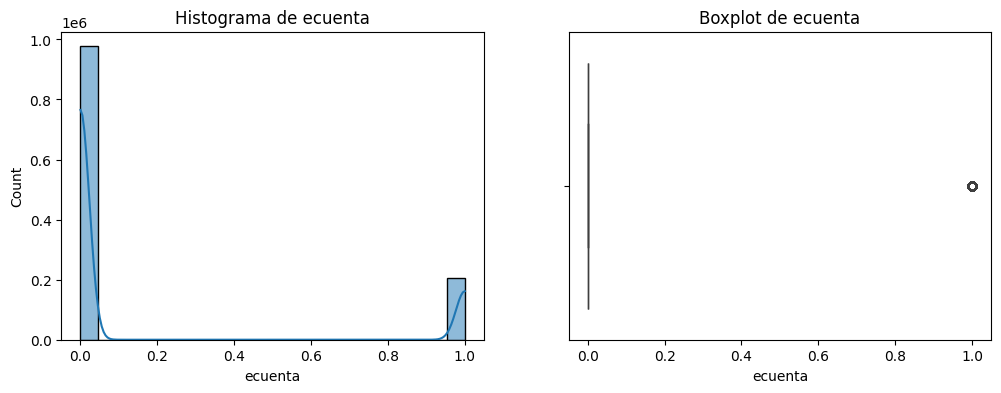

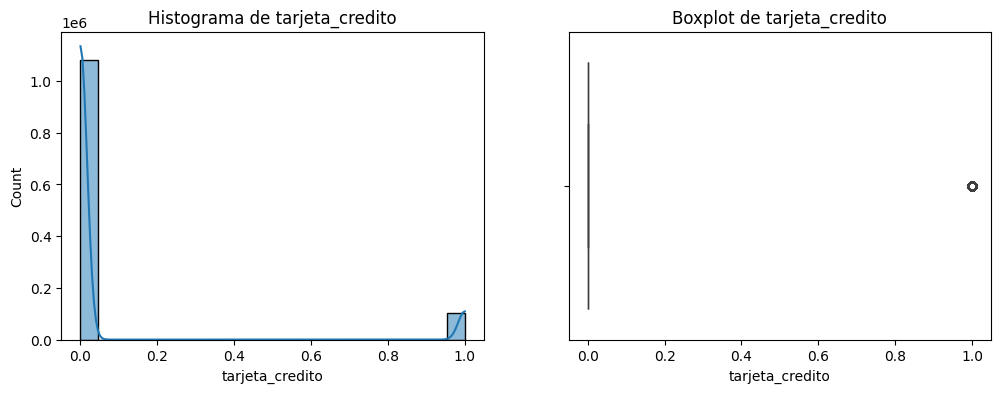

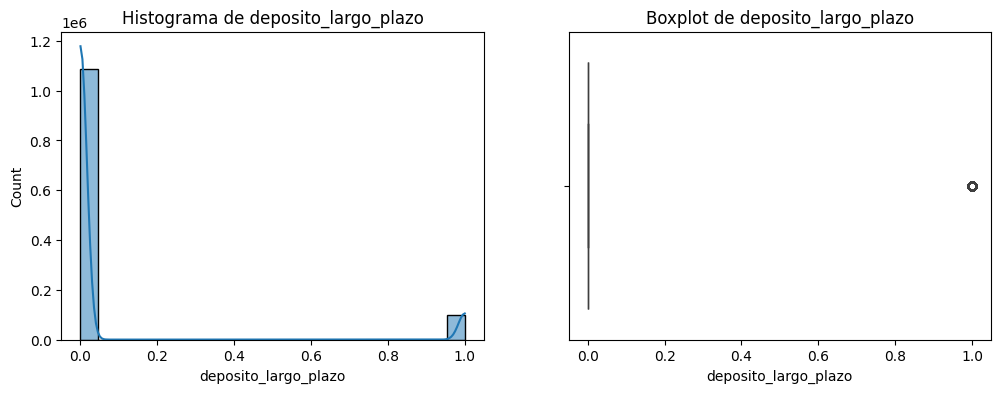

In [45]:
import seaborn as sns

for col in var_numericas_2:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


## Análisis multivariado

## Evolución de clientes por mes 

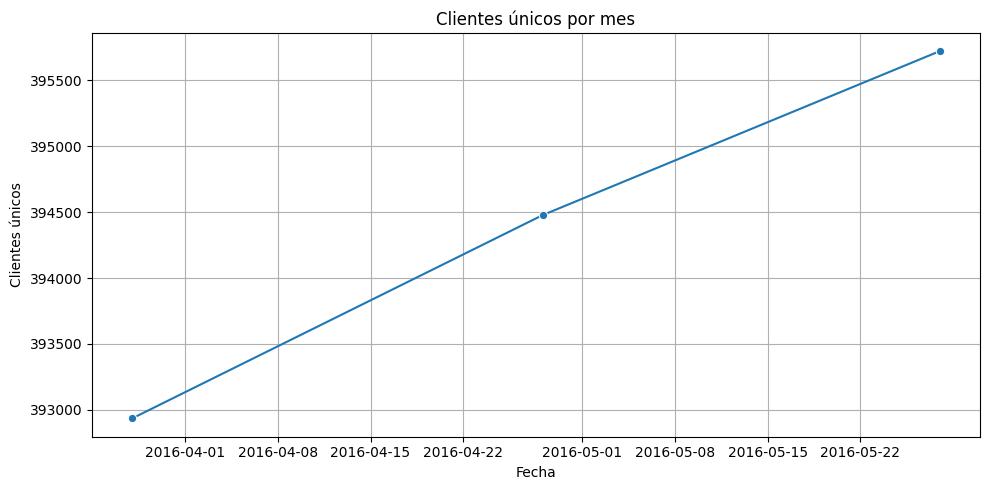

In [46]:
import seaborn as sns
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])

clientes_mes = df.groupby('fecha_dato')['ncodpers'].nunique().reset_index()
clientes_mes.columns = ['fecha', 'clientes_unicos']

plt.figure(figsize=(10, 5))
sns.lineplot(data=clientes_mes, x='fecha', y='clientes_unicos', marker='o')
plt.title("Clientes únicos por mes")
plt.xlabel("Fecha")
plt.ylabel("Clientes únicos")
plt.grid(True)
plt.tight_layout()
plt.show()

## Promedio de renta por segmento :

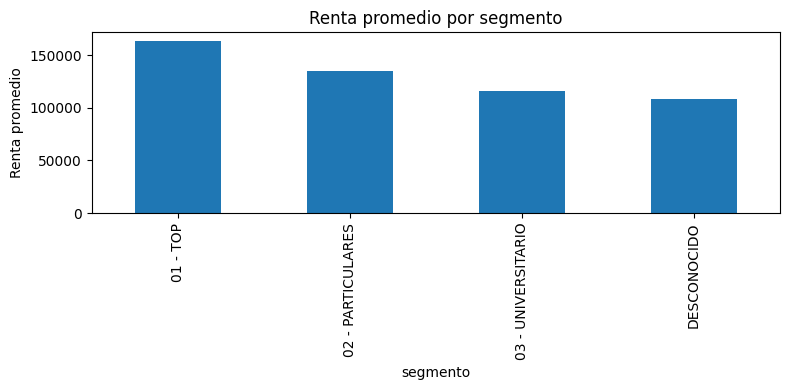

In [47]:
df.groupby('segmento')['renta'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title("Renta promedio por segmento")
plt.ylabel("Renta promedio")
plt.tight_layout()
plt.show()


## Proporción de uso de productos clave 

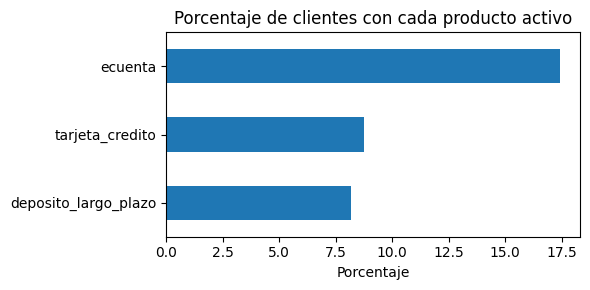

In [48]:
productos = ['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']

uso_productos = {prod: df[prod].mean()*100 for prod in productos}
pd.Series(uso_productos).sort_values().plot(kind='barh', figsize=(6, 3))
plt.title("Porcentaje de clientes con cada producto activo")
plt.xlabel("Porcentaje")
plt.tight_layout()
plt.show()


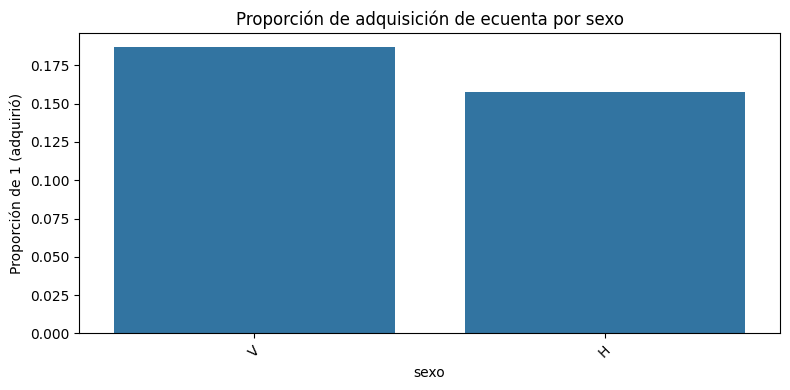

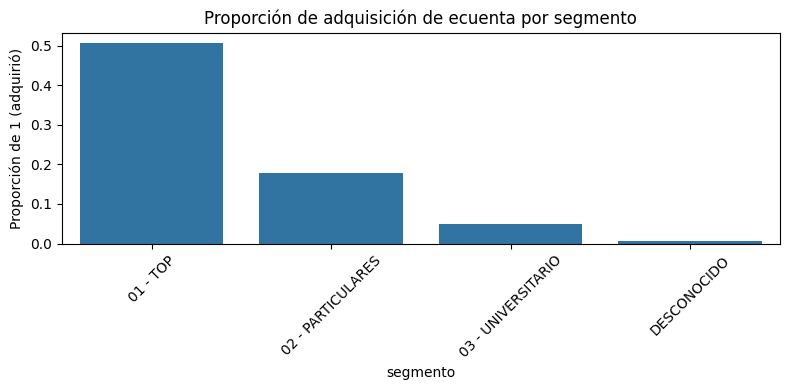

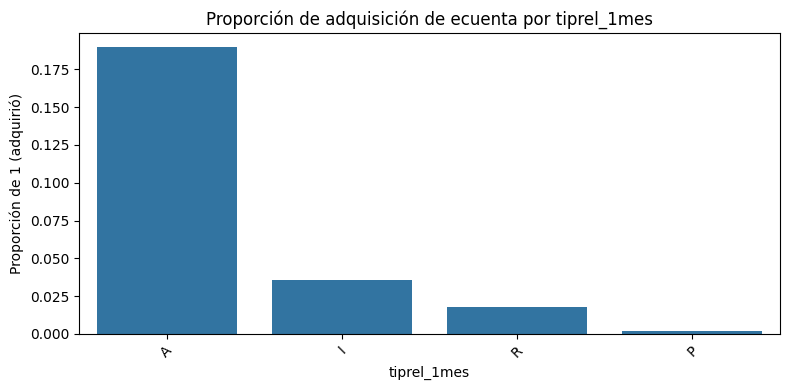

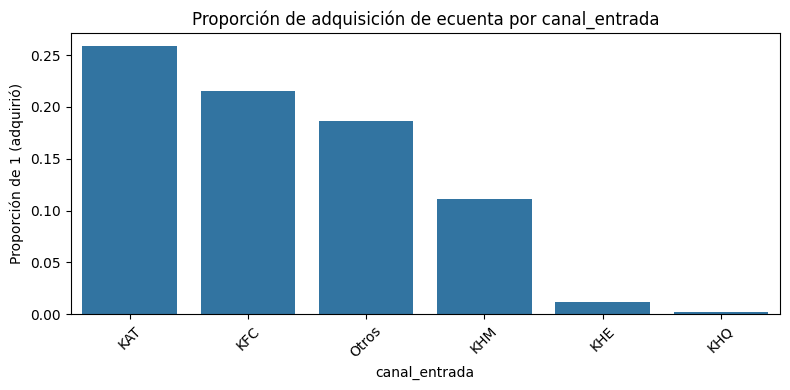

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['sexo', 'segmento', 'tiprel_1mes', 'canal_entrada']  # Ajusta según tus variables
target = 'ecuenta'  # Ajusta según tu producto objetivo

for col in cat_vars:
    plt.figure(figsize=(8, 4))
    prop = df.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Proporción de adquisición de {target} por {col}')
    plt.ylabel('Proporción de 1 (adquirió)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


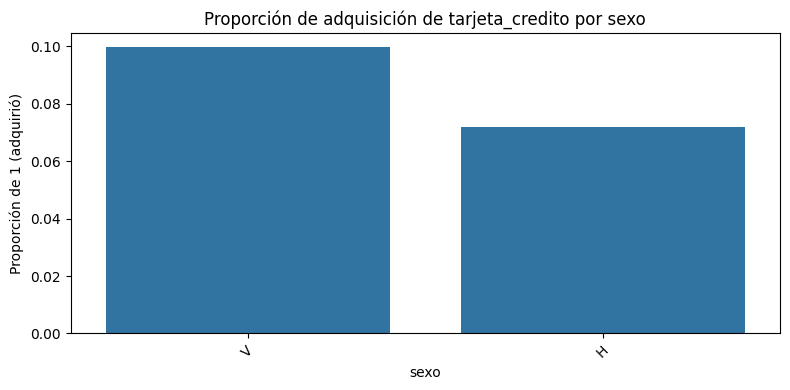

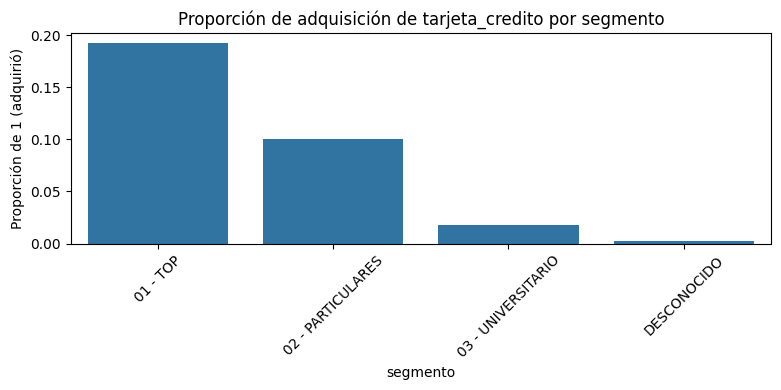

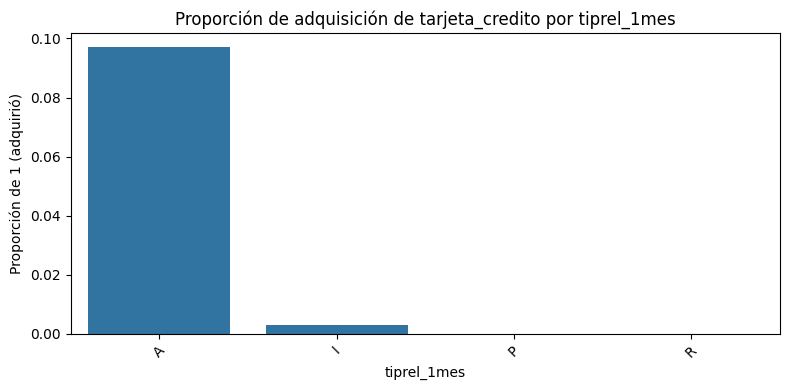

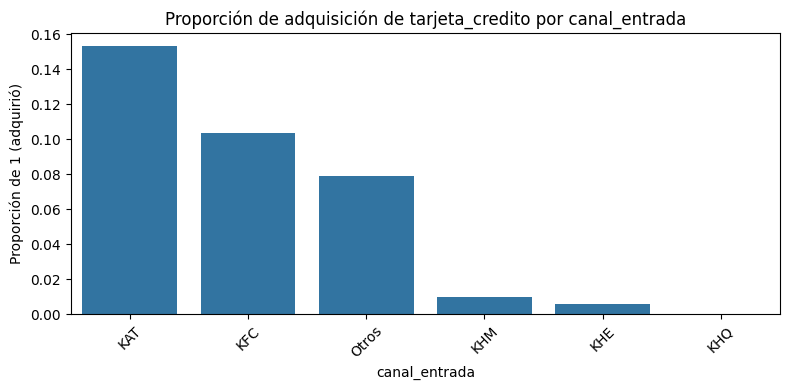

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['sexo', 'segmento', 'tiprel_1mes', 'canal_entrada']  # Ajusta según tus variables
target = 'tarjeta_credito'  # Ajusta según tu producto objetivo

for col in cat_vars:
    plt.figure(figsize=(8, 4))
    prop = df.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Proporción de adquisición de {target} por {col}')
    plt.ylabel('Proporción de 1 (adquirió)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


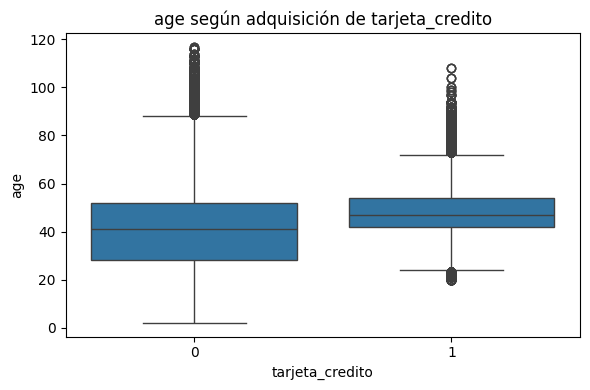

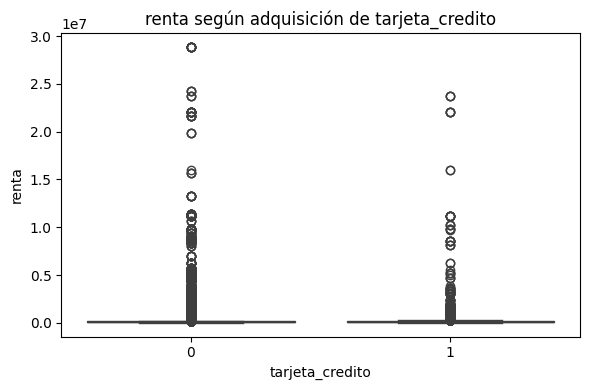

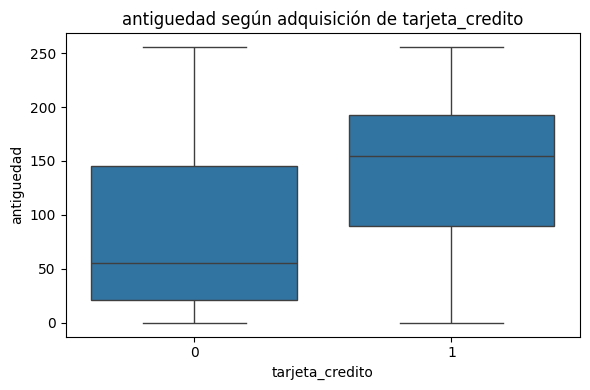

In [ ]:
num_vars = ['age', 'renta', 'antiguedad']  # Ajusta según tu dataset
target = 'tarjeta_credito' 
for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} según adquisición de {target}')
    plt.tight_layout()
    plt.show()


In [ ]:
# sns.pairplot(df[[target, 'age', 'renta', 'antiguedad']], hue=target) 

## Matriz de correlación 

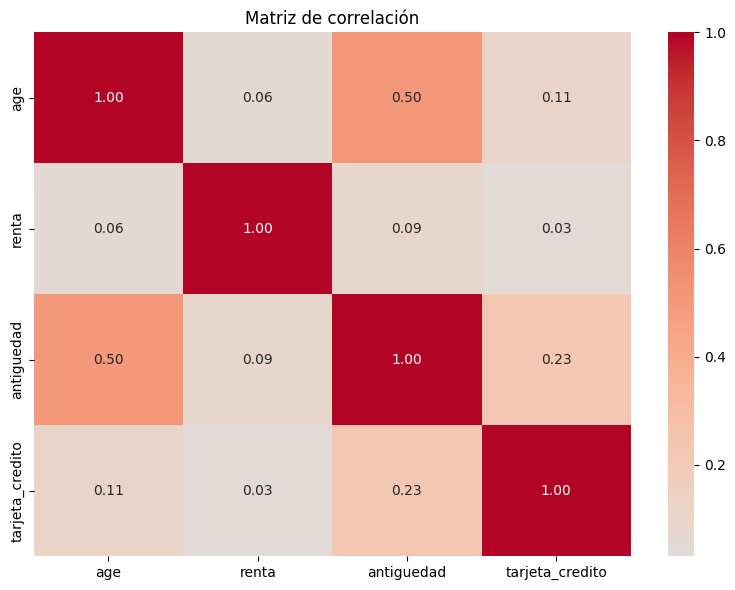

In [ ]:
import numpy as np
# AGREGAR LAS CATEGORICAS !!!!
# PATRONES DENTRO DEL DATASET, PARA DETERMINAR LAS COLUMNAS TARGET LO QUE INFLUYE 

# Incluye solo columnas numéricas + target
target = 'tarjeta_credito' 
corr_df = df[num_vars + [target]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()


## Descargamos el archivo 

In [ ]:
df.to_csv("santander_limpio.csv", index=False)

## Featuring engenieering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  

codpers                    0
age                         0
antiguedad               5371
renta                       0
total_productos        862240
antiguedad_por_edad      5371
meses_desde_alta           73

In [23]:
## Total productos !!
df['total_productos'] = df[['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']].sum(axis=1)

#Tiene ecuenta y tarjeta de crédito 
df['tiene_ecuenta_y_tarjeta'] = df['ecuenta'] * df['tarjeta_credito']  


#antiguedad por edad:
# expresa el porcentaje de vida que lleva el cliente en el banco 
df['antiguedad_por_edad'] = df['antiguedad'] / (df['age'] * 12)  # Convertir edad a meses


In [24]:
df['meses_desde_alta'] = (df['fecha_dato'] - df['fecha_alta']).dt.days / 30  

In [25]:
df.head(5)

,ncodpers,fecha_dato,fecha_alta,sexo,age,ind_empleado,ind_nuevo,antiguedad,indrel,indrel_1mes,...,renta,ind_actividad_cliente,canal_entrada,ecuenta,tarjeta_credito,deposito_largo_plazo,total_productos,tiene_ecuenta_y_tarjeta,antiguedad_por_edad,meses_desde_alta
0,466167,2016-03-28,2004-03-29,H,60,N,0.0,144,1.0,1.0,...,108126.36,1.0,KAT,0,0,0,0,0,0.200000,146.066667
1,1419835,2016-03-28,2015-07-28,V,21,N,0.0,8,1.0,1.0,...,108126.36,1.0,KHQ,0,0,0,0,0,0.031746,8.133333
2,1242168,2016-03-28,2014-02-06,V,40,N,0.0,25,1.0,1.0,...,169202.01,1.0,KFC,0,0,0,0,0,0.052083,26.033333
3,1442576,2016-03-28,2015-09-06,H,24,N,0.0,6,1.0,1.0,...,108126.36,1.0,KHM,0,0,0,0,0,0.020833,6.800000
4,1442580,2016-03-28,2015-09-06,V,47,N,0.0,6,1.0,1.0,...,127538.82,1.0,KHM,0,0,0,0,0,0.010638,6.800000


In [26]:
df['tiprel_1mes'].value_counts()

tiprel_1mes
A    1065700
I     116853
P        467
R        113
Name: count, dtype: int64

## Codificar variables categóricas

In [ ]:
df = pd.get_dummies(df, columns=['sexo', 'segmento', 'canal_entrada', 'tiprel_1mes'], drop_first=True)

## Normalizar o escalar variables numéricas

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['renta', 'age', 'antiguedad']] = scaler.fit_transform(df[['renta', 'age', 'antiguedad']])


## Revisar clases desbalanceadas en el target

## pendientes : 
# 5.1 Transformación de variables categóricas para correlación
# matriz de correlacion
# featuring engineering (personas que adquirieron el producto en el trimestre
# columna predictora  saber cuantos productos tiene cada persona
# fecha alta y fecha dato para saber antiguedad 
   )


In [16]:
consultar_fecha= """
SELECT distinct(fecha_dato) AS total_fechas
FROM santander_trimestre
"""

df_fechas = pd.read_sql(consultar_fecha, con)
df_fechas

,total_fechas
0,2016-03-28
1,2016-04-28
2,2016-05-28


In [17]:
clientes_unicos = '''
SELECT fecha_dato, COUNT(DISTINCT ncodpers) AS clientes_unicos
FROM santander_trimestre
where ind_actividad_cliente=1
GROUP BY fecha_dato
ORDER BY fecha_dato;

'''
df_cli_uni= pd.read_sql(clientes_unicos, con)
df_cli_uni

,fecha_dato,clientes_unicos
0,2016-03-28,392937
1,2016-04-28,394479
2,2016-05-28,395723


In [18]:
sumatoria_por_productos = '''

SELECT 
    fecha_dato,
    total_productos_activos,
    COUNT(*) AS cantidad_clientes
FROM (
    SELECT 
        ncodpers,
        fecha_dato,
        (
            COALESCE(ind_ahor_fin_ult1, 0) +
            COALESCE(ind_aval_fin_ult1, 0) +
            COALESCE(ind_cco_fin_ult1, 0) +
            COALESCE(ind_cder_fin_ult1, 0) +
            COALESCE(ind_cno_fin_ult1, 0) +
            COALESCE(ind_ctju_fin_ult1, 0) +
            COALESCE(ind_ctma_fin_ult1, 0) +
            COALESCE(ind_ctop_fin_ult1, 0) +
            COALESCE(ind_ctpp_fin_ult1, 0) +
            COALESCE(ind_deco_fin_ult1, 0) +
            COALESCE(ind_deme_fin_ult1, 0) +
            COALESCE(ind_dela_fin_ult1, 0) +
            COALESCE(ind_ecue_fin_ult1, 0) +
            COALESCE(ind_fond_fin_ult1, 0) +
            COALESCE(ind_hip_fin_ult1, 0) +
            COALESCE(ind_plan_fin_ult1, 0) +
            COALESCE(ind_pres_fin_ult1, 0) +
            COALESCE(ind_reca_fin_ult1, 0) +
            COALESCE(ind_tjcr_fin_ult1, 0) +
            COALESCE(ind_valo_fin_ult1, 0) +
            COALESCE(ind_viv_fin_ult1, 0) +
            COALESCE(ind_nomina_ult1, 0) +
            COALESCE(ind_nom_pens_ult1, 0) +
            COALESCE(ind_recibo_ult1, 0)
        ) AS total_productos_activos
    FROM santander_trimestre
    WHERE ind_actividad_cliente = 1
) AS sub
where total_productos_activos <10
GROUP BY fecha_dato, total_productos_activos
ORDER BY fecha_dato, total_productos_activos;
'''

df_conteo_productos= pd.read_sql(sumatoria_por_productos, con)
df_conteo_productos


,fecha_dato,total_productos_activos,cantidad_clientes
0,2016-03-28,0.0,1535
1,2016-03-28,1.0,170027
2,2016-03-28,2.0,100784
3,2016-03-28,3.0,46567
4,2016-03-28,4.0,28040
5,2016-03-28,5.0,17869
6,2016-03-28,6.0,12400
7,2016-03-28,7.0,8320
8,2016-03-28,8.0,4450
9,2016-03-28,9.0,1920


In [19]:
df_total_fechas = df[['fecha_dato']].drop_duplicates().rename(columns={'fecha_dato': 'total_fechas'})
